In [1]:
import data_setup
import torchvision
import torch
from torchvision import transforms

device = 'cuda' if torch.cuda.is_available else 'cpu'

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
manual_tranforms = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor(), normalize])

train_dir = "./multipvp_midalgo_640_15_2/train"
test_dir = "./multipvp_midalgo_640_15_2/test"

train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir, test_dir=test_dir, transform=manual_tranforms, batch_size=32)

In [2]:
#del model
torch.cuda.empty_cache()

In [3]:
device, train_dataloader, test_dataloader, class_names

('cuda',
 ['baseplate',
  'major_capsid',
  'major_tail',
  'minor_capsid',
  'minor_tail',
  'other',
  'portal',
  'tail_fiber'])

In [4]:
weights = torchvision.models.GoogLeNet_Weights.DEFAULT
model = torchvision.models.googlenet(weights=weights).to(device)
model

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [5]:
from torchinfo import summary

summary(model=model, input_size=(1, 3, 224, 224), col_names=['input_size', 'output_size', 'num_params', 'trainable'], col_width=20, row_settings=['var_names'])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
GoogLeNet (GoogLeNet)                    [1, 3, 224, 224]     [1, 1000]            --                   True
├─BasicConv2d (conv1)                    [1, 3, 224, 224]     [1, 64, 112, 112]    --                   True
│    └─Conv2d (conv)                     [1, 3, 224, 224]     [1, 64, 112, 112]    9,408                True
│    └─BatchNorm2d (bn)                  [1, 64, 112, 112]    [1, 64, 112, 112]    128                  True
├─MaxPool2d (maxpool1)                   [1, 64, 112, 112]    [1, 64, 56, 56]      --                   --
├─BasicConv2d (conv2)                    [1, 64, 56, 56]      [1, 64, 56, 56]      --                   True
│    └─Conv2d (conv)                     [1, 64, 56, 56]      [1, 64, 56, 56]      4,096                True
│    └─BatchNorm2d (bn)                  [1, 64, 56, 56]      [1, 64, 56, 56]      128                  True
├─BasicConv2d (c

In [6]:
#for param in model.features.parameters():
#    param.requires_grad = True

In [6]:
summary(model=model, input_size=(1, 3, 224, 224), col_names=['input_size', 'output_size', 'num_params', 'trainable'], col_width=20, row_settings=['var_names'])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
GoogLeNet (GoogLeNet)                    [1, 3, 224, 224]     [1, 1000]            --                   True
├─BasicConv2d (conv1)                    [1, 3, 224, 224]     [1, 64, 112, 112]    --                   True
│    └─Conv2d (conv)                     [1, 3, 224, 224]     [1, 64, 112, 112]    9,408                True
│    └─BatchNorm2d (bn)                  [1, 64, 112, 112]    [1, 64, 112, 112]    128                  True
├─MaxPool2d (maxpool1)                   [1, 64, 112, 112]    [1, 64, 56, 56]      --                   --
├─BasicConv2d (conv2)                    [1, 64, 56, 56]      [1, 64, 56, 56]      --                   True
│    └─Conv2d (conv)                     [1, 64, 56, 56]      [1, 64, 56, 56]      4,096                True
│    └─BatchNorm2d (bn)                  [1, 64, 56, 56]      [1, 64, 56, 56]      128                  True
├─BasicConv2d (c

In [7]:
model.fc

Linear(in_features=1024, out_features=1000, bias=True)

In [8]:
from torch import nn

model.fc = nn.Linear(in_features=1024, out_features=len(class_names), bias=True).to(device)



In [9]:
summary(model=model, input_size=(1, 3, 224, 224), col_names=['input_size', 'output_size', 'num_params', 'trainable'], col_width=20, row_settings=['var_names'])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
GoogLeNet (GoogLeNet)                    [1, 3, 224, 224]     [1, 8]               --                   True
├─BasicConv2d (conv1)                    [1, 3, 224, 224]     [1, 64, 112, 112]    --                   True
│    └─Conv2d (conv)                     [1, 3, 224, 224]     [1, 64, 112, 112]    9,408                True
│    └─BatchNorm2d (bn)                  [1, 64, 112, 112]    [1, 64, 112, 112]    128                  True
├─MaxPool2d (maxpool1)                   [1, 64, 112, 112]    [1, 64, 56, 56]      --                   --
├─BasicConv2d (conv2)                    [1, 64, 56, 56]      [1, 64, 56, 56]      --                   True
│    └─Conv2d (conv)                     [1, 64, 56, 56]      [1, 64, 56, 56]      4,096                True
│    └─BatchNorm2d (bn)                  [1, 64, 56, 56]      [1, 64, 56, 56]      128                  True
├─BasicConv2d (c

In [10]:
model.fc

Linear(in_features=1024, out_features=8, bias=True)

In [11]:
import engine

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

results = engine.train(model=model, train_dataloader=train_dataloader, test_dataloader=test_dataloader, optimizer=optimizer, loss_fn=loss_fn, epochs=25, device=device)

e:\Research\research\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  4%|▍         | 1/25 [02:13<53:17, 133.21s/it]

Epoch: 1 | train_loss: 1.1692 | train_acc: 0.5981 | test_loss: 0.9369 | test_acc: 0.6827


  8%|▊         | 2/25 [04:24<50:38, 132.11s/it]

Epoch: 2 | train_loss: 0.8082 | train_acc: 0.7287 | test_loss: 0.8511 | test_acc: 0.7174


 12%|█▏        | 3/25 [06:36<48:22, 131.91s/it]

Epoch: 3 | train_loss: 0.5879 | train_acc: 0.8050 | test_loss: 0.8002 | test_acc: 0.7293


 16%|█▌        | 4/25 [08:47<46:06, 131.75s/it]

Epoch: 4 | train_loss: 0.3947 | train_acc: 0.8729 | test_loss: 0.8818 | test_acc: 0.7367


 20%|██        | 5/25 [10:59<43:52, 131.61s/it]

Epoch: 5 | train_loss: 0.2572 | train_acc: 0.9193 | test_loss: 0.9130 | test_acc: 0.7331


 24%|██▍       | 6/25 [13:10<41:38, 131.48s/it]

Epoch: 6 | train_loss: 0.1833 | train_acc: 0.9445 | test_loss: 0.9791 | test_acc: 0.7517


 28%|██▊       | 7/25 [15:21<39:25, 131.43s/it]

Epoch: 7 | train_loss: 0.1424 | train_acc: 0.9567 | test_loss: 1.0692 | test_acc: 0.7559


 32%|███▏      | 8/25 [17:32<37:13, 131.40s/it]

Epoch: 8 | train_loss: 0.1159 | train_acc: 0.9651 | test_loss: 1.0596 | test_acc: 0.7377


 36%|███▌      | 9/25 [19:44<35:00, 131.30s/it]

Epoch: 9 | train_loss: 0.0989 | train_acc: 0.9706 | test_loss: 1.0379 | test_acc: 0.7652


 40%|████      | 10/25 [21:55<32:51, 131.42s/it]

Epoch: 10 | train_loss: 0.0983 | train_acc: 0.9696 | test_loss: 1.2336 | test_acc: 0.7377


 44%|████▍     | 11/25 [24:06<30:38, 131.30s/it]

Epoch: 11 | train_loss: 0.0900 | train_acc: 0.9715 | test_loss: 1.1005 | test_acc: 0.7597


 48%|████▊     | 12/25 [26:17<28:25, 131.17s/it]

Epoch: 12 | train_loss: 0.0822 | train_acc: 0.9729 | test_loss: 1.2038 | test_acc: 0.7476


 52%|█████▏    | 13/25 [28:29<26:14, 131.24s/it]

Epoch: 13 | train_loss: 0.0781 | train_acc: 0.9752 | test_loss: 1.3607 | test_acc: 0.7399


 56%|█████▌    | 14/25 [30:40<24:03, 131.24s/it]

Epoch: 14 | train_loss: 0.0722 | train_acc: 0.9762 | test_loss: 1.2487 | test_acc: 0.7402


 60%|██████    | 15/25 [32:51<21:52, 131.29s/it]

Epoch: 15 | train_loss: 0.0793 | train_acc: 0.9733 | test_loss: 1.2662 | test_acc: 0.7633


 64%|██████▍   | 16/25 [35:03<19:42, 131.38s/it]

Epoch: 16 | train_loss: 0.0658 | train_acc: 0.9778 | test_loss: 1.2260 | test_acc: 0.7651


 68%|██████▊   | 17/25 [37:14<17:31, 131.43s/it]

Epoch: 17 | train_loss: 0.0697 | train_acc: 0.9761 | test_loss: 1.2378 | test_acc: 0.7439


 72%|███████▏  | 18/25 [39:26<15:19, 131.40s/it]

Epoch: 18 | train_loss: 0.0588 | train_acc: 0.9802 | test_loss: 1.2901 | test_acc: 0.7491


 76%|███████▌  | 19/25 [41:37<13:07, 131.30s/it]

Epoch: 19 | train_loss: 0.0660 | train_acc: 0.9774 | test_loss: 1.2720 | test_acc: 0.7608


 80%|████████  | 20/25 [43:48<10:56, 131.39s/it]

Epoch: 20 | train_loss: 0.0564 | train_acc: 0.9804 | test_loss: 1.2723 | test_acc: 0.7633


 84%|████████▍ | 21/25 [46:00<08:45, 131.49s/it]

Epoch: 21 | train_loss: 0.0550 | train_acc: 0.9807 | test_loss: 1.2806 | test_acc: 0.7402


 88%|████████▊ | 22/25 [48:11<06:34, 131.39s/it]

Epoch: 22 | train_loss: 0.0587 | train_acc: 0.9798 | test_loss: 1.3402 | test_acc: 0.7592


 92%|█████████▏| 23/25 [50:23<04:22, 131.46s/it]

Epoch: 23 | train_loss: 0.0549 | train_acc: 0.9815 | test_loss: 1.2817 | test_acc: 0.7711


 96%|█████████▌| 24/25 [52:37<02:12, 132.17s/it]

Epoch: 24 | train_loss: 0.0454 | train_acc: 0.9839 | test_loss: 1.4186 | test_acc: 0.7560


100%|██████████| 25/25 [54:48<00:00, 131.54s/it]

Epoch: 25 | train_loss: 0.0652 | train_acc: 0.9780 | test_loss: 1.3004 | test_acc: 0.7631


In [12]:
def plot_loss_curves(results):
    loss = results["train_loss"]
    test_loss = results["test_loss"]

    acc = results["train_acc"]
    test_acc = results["test_acc"]

    epochs = range(len(results["train_loss"]))

    plt.figure(figsize=(15, 7))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, label="train_accuracy")
    plt.plot(epochs, test_acc, label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

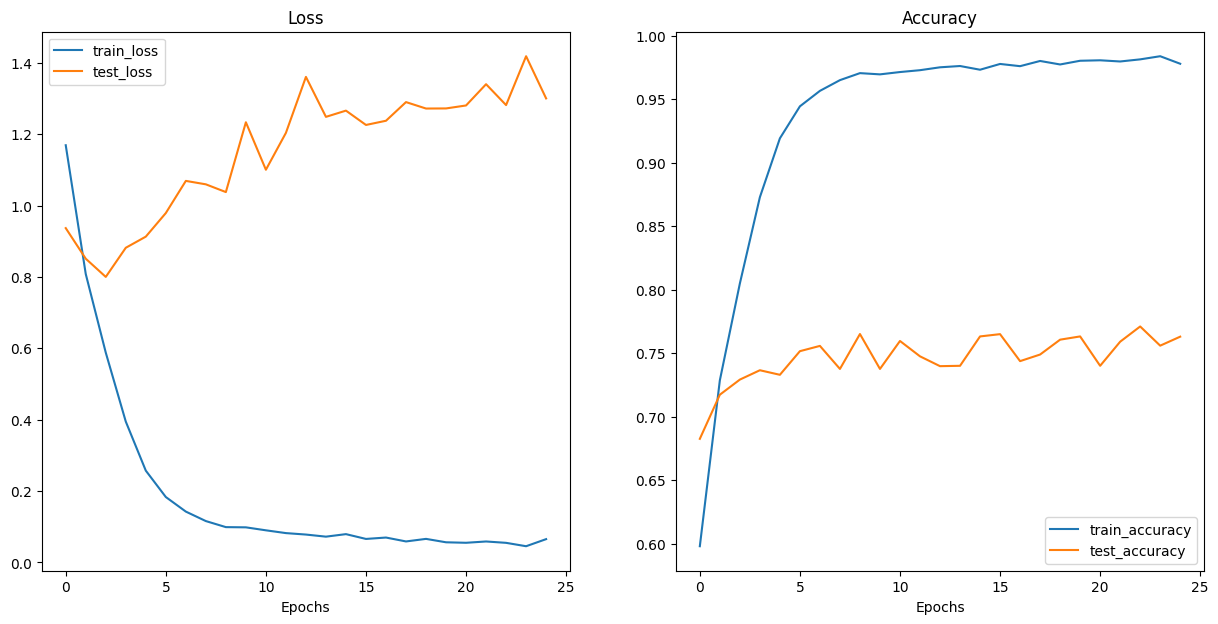

In [13]:
import matplotlib.pyplot as plt

plot_loss_curves(results)

In [14]:
import utils

utils.save_model(model, "./", "googlenet_multi_89.pth")

[INFO] Saving model to: googlenet_multi_89.pth
